In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\amedh\OneDrive\Desktop\Amedh\projects\Car\car_prices.csv')

In [3]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [4]:
df.shape

(558837, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [8]:
cols = [
    "year",
    "make",
    "model",
    "body",
    "state",
    "condition",
    "odometer",
    "mmr",
    "sellingprice",
    "saledate"
]

df = df[cols]
df.head()

,year,make,model,body,state,condition,odometer,mmr,sellingprice,saledate
0,2015,Kia,Sorento,SUV,ca,5.0,16639.0,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,SUV,ca,5.0,9393.0,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,Sedan,ca,45.0,1331.0,31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,Sedan,ca,41.0,14282.0,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,Sedan,ca,43.0,2641.0,66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [9]:
df.isnull().sum()

year                0
make            10301
model           10399
body            13195
state               0
condition       11820
odometer           94
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [14]:
df = df.dropna()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 534280 entries, 0 to 558836
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          534280 non-null  int64  
 1   make          534280 non-null  object 
 2   model         534280 non-null  object 
 3   body          534280 non-null  object 
 4   state         534280 non-null  object 
 5   condition     534280 non-null  float64
 6   odometer      534280 non-null  float64
 7   mmr           534280 non-null  float64
 8   sellingprice  534280 non-null  float64
 9   saledate      534280 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 44.8+ MB


In [17]:
df["price_diff"] = df["sellingprice"] - df["mmr"]
df["price_diff_pct"] = df["price_diff"]/df["mmr"]

In [18]:
df.head()

,year,make,model,body,state,condition,odometer,mmr,sellingprice,saledate,price_diff,price_diff_pct
0,2015,Kia,Sorento,SUV,ca,5.0,16639.0,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),1000.0,0.048780
1,2015,Kia,Sorento,SUV,ca,5.0,9393.0,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),700.0,0.033654
2,2014,BMW,3 Series,Sedan,ca,45.0,1331.0,31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),-1900.0,-0.059561
3,2015,Volvo,S60,Sedan,ca,41.0,14282.0,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),250.0,0.009091
4,2014,BMW,6 Series Gran Coupe,Sedan,ca,43.0,2641.0,66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),1000.0,0.015152


In [19]:
df['price_diff'].describe()

count    534280.000000
mean       -153.308668
std        1744.312292
min      -87750.000000
25%        -800.000000
50%         -50.000000
75%         650.000000
max      207200.000000
Name: price_diff, dtype: float64

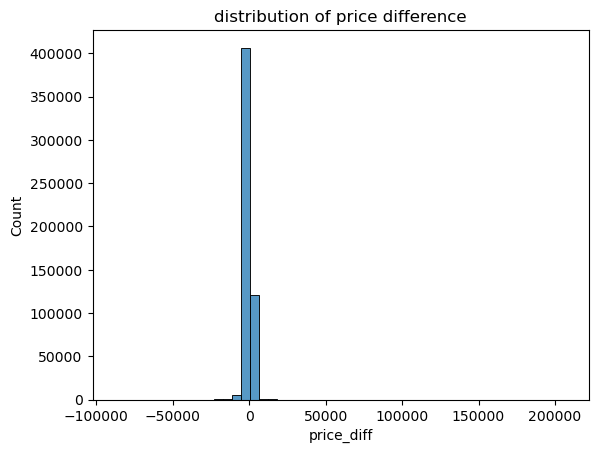

In [27]:
sns.histplot(df["price_diff"], bins=50)
plt.title("distribution of price difference")
plt.show()

In [28]:
'''Key Observations from the histogram
The distribution of "price_diff" = sellingprice - mmr is:
Highly concentrated around 0
Strongly skewed
Has long tails on both sides

Most Vehicles sell close to the mmr, but:
A non-trivial number sell far above or below expectation

This immediately implies:

The distribution is NOT normal
The mean is not a reliable summary
Median is a better central measure'''

'Key Observations from the histogram\nThe distribution of "price_diff" = sellingprice - mmr is:\nHighly concentrated around 0\nStrongly skewed\nHas long tails on both sides\n\nMost Vehicles sell close to the mmr, but:\nA non-trivial number sell far above or below expectation\n\nThis immediately implies:\n\nThe distribution is NOT normal\nThe mean is not a reliable summary\nMedian is a better central measure'

In [29]:
mean_diff = df["price_diff"].mean()
median_diff = df["price_diff"].median()

mean_diff, median_diff

(np.float64(-153.30866773976192), -50.0)

In [31]:
'''The mean price difference is heavily influenced by extreme values, while the median better represents the typical deviation from MMR.'''

'The mean price difference is heavily influenced by extreme values, while the median better represents the typical deviation from MMR.'

In [32]:
df["price_diff"].quantile([0.01, 0.05, 0.5, 0.95, 0.99])

0.01   -5500.0
0.05   -2700.0
0.50     -50.0
0.95    2050.0
0.99    3700.0
Name: price_diff, dtype: float64

In [36]:
'''Median price_diff ≈ -50
Typical vehicle sells very close to MMR

Strong asymmetry

Bottom 1% sell ~₹5,500 below MMR

Top 1% sell ~₹3,700 above MMR

Longer downside tail
Downward deviations are more extreme than upward ones

This is not symmetric and not normal.'''

'Median price_diff ≈ -50\nTypical vehicle sells very close to MMR\n\nStrong asymmetry\n\nBottom 1% sell ~₹5,500 below MMR\n\nTop 1% sell ~₹3,700 above MMR\n\nLonger downside tail\nDownward deviations are more extreme than upward ones\n\nThis is not symmetric and not normal.'

In [33]:
outlier_mask = (df["price_diff"].abs() > df["price_diff"].quantile(0.99))
outlier_mask.mean()

np.float64(0.03503406453544958)

In [37]:
'''Only ~3.5% of transactions create extreme deviations

Yet these dominate the mean

This proves:

Mean-based insights are misleading for this dataset

This is a classic AI failure point.'''

'Only ~3.5% of transactions create extreme deviations\n\nYet these dominate the mean\n\nThis proves:\n\nMean-based insights are misleading for this dataset\n\nThis is a classic AI failure point.'

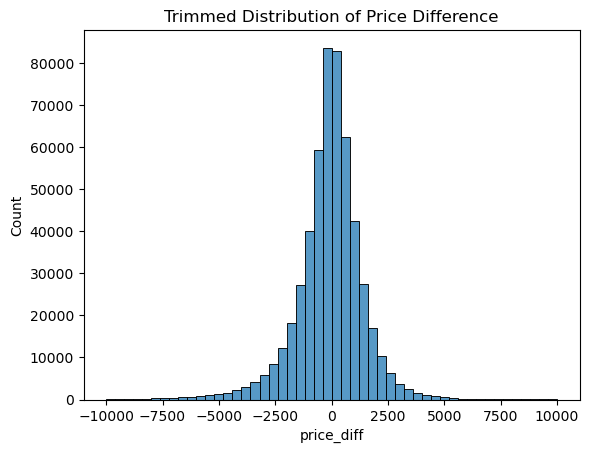

In [34]:
sns.histplot(
    df[df["price_diff"].between(-10000, 10000)]["price_diff"],
    bins=50
)
plt.title("Trimmed Distribution of Price Difference")
plt.show()

In [38]:
'''Your trimmed plot shows:

Clear bell-like structure around 0

Tight concentration for 95%+ of data

Extreme tails are rare but impactful

Key reasoning insight:

Most market behavior is stable, but rare cases distort aggregate metrics.'''

'Your trimmed plot shows:\n\nClear bell-like structure around 0\n\nTight concentration for 95%+ of data\n\nExtreme tails are rare but impactful\n\nKey reasoning insight:\n\nMost market behavior is stable, but rare cases distort aggregate metrics.'

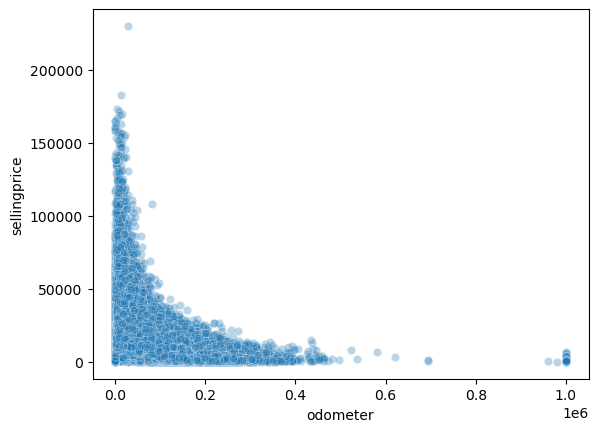

In [22]:
sns.scatterplot(x="odometer", y="sellingprice", data=df, alpha=0.3)
plt.show()

In [ ]:
'''Human interpretation (what you should conclude):

There is a strong negative relationship between odometer and sellingprice

BUT the relationship is:

Non-linear

Heteroscedastic (variance changes with mileage)

Heavily influenced by other variables (year, make, model)

Key visual cues:

At low mileage → prices range widely (₹10k to ₹200k+)

At high mileage → prices collapse into a narrow low band

Price drop is steep initially, then flattens

This is NOT a simple linear relationship.'''

In [39]:
df[["odometer", "sellingprice"]].corr()

,odometer,sellingprice
odometer,1.000000,-0.575998
sellingprice,-0.575998,1.000000


In [50]:
'''This is a moderate negative correlation

Mileage and price move in opposite directions

BUT correlation ≠ explanation'''

'This is a moderate negative correlation\n\nMileage and price move in opposite directions\n\nBUT correlation ≠ explanation'

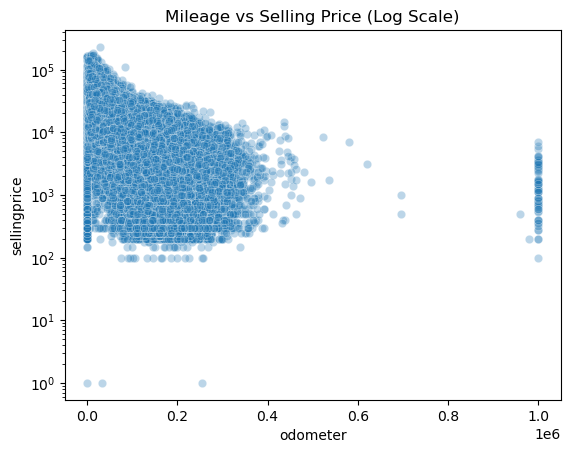

In [40]:
sns.scatterplot(
    x="odometer",
    y="sellingprice",
    data=df,
    alpha=0.3
)
plt.yscale("log")
plt.title("Mileage vs Selling Price (Log Scale)")
plt.show()

In [51]:
'''Log-scaling reveals a non-linear decay pattern, confirming that mileage impact on price is not constant across ranges.'''

'Log-scaling reveals a non-linear decay pattern, confirming that mileage impact on price is not constant across ranges.'

In [48]:
df["vehicle_age"] = df["saledate"].dt.year - df["year"]

pd.cut(
    df["vehicle_age"],
    bins=[0, 3, 6, 10, 20],
    labels=["0–3 yrs", "4–6 yrs", "7–10 yrs", "10+ yrs"]
)    

0             NaN
1             NaN
2         0–3 yrs
3             NaN
4             NaN
           ...   
558832        NaN
558833        NaN
558834        NaN
558835        NaN
558836        NaN
Name: vehicle_age, Length: 534280, dtype: category
Categories (4, object): ['0–3 yrs' < '4–6 yrs' < '7–10 yrs' < '10+ yrs']

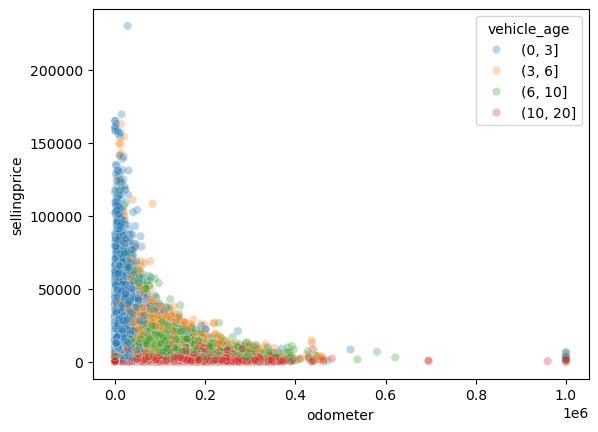

In [49]:
sns.scatterplot(
    x="odometer",
    y="sellingprice",
    hue=pd.cut(df["vehicle_age"], [0,3,6,10,20]),
    data=df,
    alpha=0.3
)
plt.show()

In [52]:
'''Mileage and price show moderate negative correlation (≈ −0.58)

Relationship is non-linear and heteroscedastic

Variance decreases as mileage increases

Mileage impact differs significantly by vehicle age

Linear or unsegmented AI interpretations are misleading'''

'Mileage and price show moderate negative correlation (≈ −0.58)\n\nRelationship is non-linear and heteroscedastic\n\nVariance decreases as mileage increases\n\nMileage impact differs significantly by vehicle age\n\nLinear or unsegmented AI interpretations are misleading'

In [24]:
df.groupby("condition")["price_diff"].median().head()

condition
1.0   -1750.0
2.0    -825.0
3.0    -200.0
4.0     100.0
5.0     400.0
Name: price_diff, dtype: float64

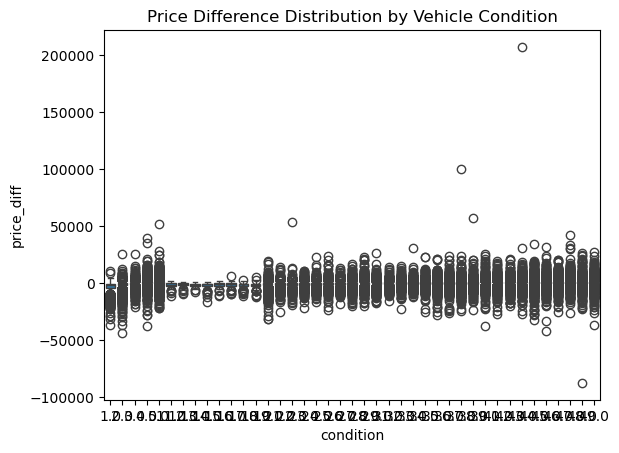

In [53]:
sns.boxplot(
    x="condition",
    y="price_diff",
    data=df
)
plt.title("Price Difference Distribution by Vehicle Condition")
plt.show()

In [54]:
'''Key observations from the plot:

Median price_diff increases with condition

Confirms your earlier table (2 → 5.8 improves median)

Huge overlap across condition levels

Low-condition and high-condition vehicles often sell in similar price_diff ranges

Condition alone does not separate pricing outcomes

Extreme outliers exist at almost all condition levels

High-condition vehicles can still sell far below MMR

Some mid-condition vehicles sell far above MMR

Variance does not shrink cleanly with condition

Even “excellent” condition has wide dispersion'''

'Key observations from the plot:\n\nMedian price_diff increases with condition\n\nConfirms your earlier table (2 → 5.8 improves median)\n\nHuge overlap across condition levels\n\nLow-condition and high-condition vehicles often sell in similar price_diff ranges\n\nCondition alone does not separate pricing outcomes\n\nExtreme outliers exist at almost all condition levels\n\nHigh-condition vehicles can still sell far below MMR\n\nSome mid-condition vehicles sell far above MMR\n\nVariance does not shrink cleanly with condition\n\nEven “excellent” condition has wide dispersion'

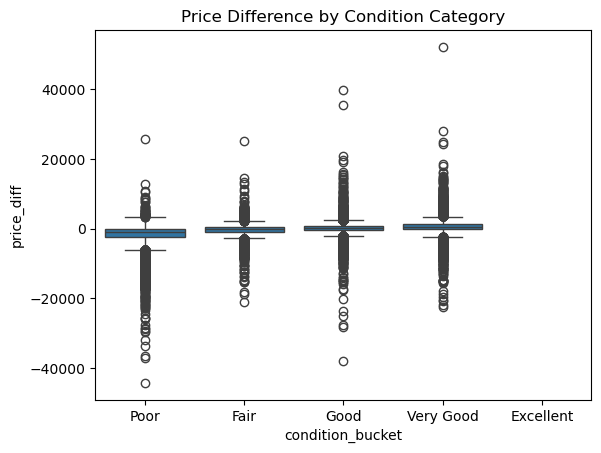

In [55]:
df["condition_bucket"] = pd.cut(
    df["condition"],
    bins=[0, 2.5, 3.5, 4.5, 5.5, 6.5],
    labels=["Poor", "Fair", "Good", "Very Good", "Excellent"]
)

sns.boxplot(
    x="condition_bucket",
    y="price_diff",
    data=df
)
plt.title("Price Difference by Condition Category")
plt.show()

In [56]:
'''Key observations from Price Difference by Condition Category:

Median shifts upward with better condition

Poor → Fair → Good → Very Good → Excellent

Confirms condition does matter

Massive overlap across all categories

Poor-condition vehicles sometimes sell above MMR

Excellent-condition vehicles often sell below MMR

Variance remains high even at “Excellent”

High-condition ≠ predictable outcome

Spread does NOT collapse with condition

Extreme outliers exist everywhere

Condition does not “protect” against large deviations'''

'Key observations from Price Difference by Condition Category:\n\nMedian shifts upward with better condition\n\nPoor → Fair → Good → Very Good → Excellent\n\nConfirms condition does matter\n\nMassive overlap across all categories\n\nPoor-condition vehicles sometimes sell above MMR\n\nExcellent-condition vehicles often sell below MMR\n\nVariance remains high even at “Excellent”\n\nHigh-condition ≠ predictable outcome\n\nSpread does NOT collapse with condition\n\nExtreme outliers exist everywhere\n\nCondition does not “protect” against large deviations'

In [25]:
state_stats = df.groupby("state").agg(
    median_price=("sellingprice", "median"),
    count=("sellingprice", "count")
).sort_values("count", ascending=False)

state_stats.head()

,median_price,count
state,,
fl,12800.0,79713
ca,12500.0,69722
pa,14300.0,52436
tx,11900.0,43769
ga,11500.0,33538


In [57]:
'''High-volume states dominate the dataset

FL & CA alone account for a huge share of transactions

Median prices differ, but not dramatically

Spread is a few thousand, not an order of magnitude

Count matters as much as price

States with small volume can look “expensive” or “cheap” by chance'''

'High-volume states dominate the dataset\n\nFL & CA alone account for a huge share of transactions\n\nMedian prices differ, but not dramatically\n\nSpread is a few thousand, not an order of magnitude\n\nCount matters as much as price\n\nStates with small volume can look “expensive” or “cheap” by chance'

In [58]:
state_stats_filtered = state_stats[state_stats["count"] > 10000]
state_stats_filtered.sort_values("median_price", ascending=False).head()

,median_price,count
state,,
tn,16000.0,20634
pa,14300.0,52436
il,14300.0,21940
mi,14000.0,15008
nv,13700.0,12019


In [60]:
'''These states appear “expensive” in absolute terms

BUT this reflects:

Vehicle mix (year, model, trim)

Auction dynamics

Regional supply

This does NOT tell us whether vehicles are overpriced or underpriced'''

'These states appear “expensive” in absolute terms\n\nBUT this reflects:\n\nVehicle mix (year, model, trim)\n\nAuction dynamics\n\nRegional supply\n\nThis does NOT tell us whether vehicles are overpriced or underpriced'

In [59]:
df["price_diff"] = df["sellingprice"] - df["mmr"]

state_diff = df.groupby("state").agg(
    median_price_diff=("price_diff", "median"),
    count=("price_diff", "count")
)

state_diff[state_diff["count"] > 10000].sort_values(
    "median_price_diff", ascending=False
).head()

,median_price_diff,count
state,,
ca,150.0,69722
nc,125.0,20908
nv,100.0,12019
tn,100.0,20634
ga,50.0,33538


In [61]:
'''Despite TN having the highest median price,
its median deviation from MMR is only +100

CA, which didn’t top raw price rankings, shows stronger positive deviation vs expectations

Raw prices ≠ market mispricing'''

'Despite TN having the highest median price,\nits median deviation from MMR is only +100\n\nCA, which didn’t top raw price rankings, shows stronger positive deviation vs expectations\n\nRaw prices ≠ market mispricing'